In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
data = {
    'dogs': [12, 17, 5, 12, 1, 5],
    'birds': [10, 7, 13, 2, 8, 19],
    'cats': [4, 14, 8, 15, 11, 3]
}

In [3]:
# Convert dictionary to a pandas df
shelter = pd.DataFrame(data)
shelter

,dogs,birds,cats
0,12,10,4
1,17,7,14
2,5,13,8
3,12,2,15
4,1,8,11
5,5,19,3


In [4]:
shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dogs    6 non-null      int64
 1   birds   6 non-null      int64
 2   cats    6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [5]:
# create a df with index names specified
idx_names = ['shelter0', 'shelter1', 'shelter2', 'shelter3', 'shelter4', 'shelter5']
shelter_indexname = pd.DataFrame(data, index=idx_names)
shelter_indexname

,dogs,birds,cats
shelter0,12,10,4
shelter1,17,7,14
shelter2,5,13,8
shelter3,12,2,15
shelter4,1,8,11
shelter5,5,19,3


In [6]:
shelter_indexname.loc['shelter3']

dogs     12
birds     2
cats     15
Name: shelter3, dtype: int64

In [7]:
# select row and column, using loc[]
shelter_indexname.loc['shelter3', 'birds']

2

In [8]:
# slice by row, using positions, python way
shelter_indexname[2:5]

,dogs,birds,cats
shelter2,5,13,8
shelter3,12,2,15
shelter4,1,8,11


In [9]:
shelter_indexname.iloc[2:5]

,dogs,birds,cats
shelter2,5,13,8
shelter3,12,2,15
shelter4,1,8,11


In [10]:
# Select multiple rows and columns with slice method
shelter_indexname.iloc[:, 1]

shelter0    10
shelter1     7
shelter2    13
shelter3     2
shelter4     8
shelter5    19
Name: birds, dtype: int64

In [11]:
shelter_indexname.iloc[2:5, 0:2]

,dogs,birds
shelter2,5,13
shelter3,12,2
shelter4,1,8


In [12]:
# select multiple columns with brackets
shelter_indexname[['dogs', 'cats']]

,dogs,cats
shelter0,12,4
shelter1,17,14
shelter2,5,8
shelter3,12,15
shelter4,1,11
shelter5,5,3


In [13]:
shelter_indexname.columns

Index(['dogs', 'birds', 'cats'], dtype='object')

In [14]:
shelter_indexname.sort_values(by='cats')

,dogs,birds,cats
shelter5,5,19,3
shelter0,12,10,4
shelter2,5,13,8
shelter4,1,8,11
shelter1,17,7,14
shelter3,12,2,15


In [15]:
# use of apply and lambda
shelter_indexname['dogs'] = shelter_indexname['dogs'].apply(lambda x: x*17)
shelter_indexname['birds'] = shelter_indexname['birds'].apply(lambda x: x*8)
shelter_indexname['cats'] = shelter_indexname['cats'].apply(lambda x: x*23)
shelter_indexname

,dogs,birds,cats
shelter0,204,80,92
shelter1,289,56,322
shelter2,85,104,184
shelter3,204,16,345
shelter4,17,64,253
shelter5,85,152,69


In [16]:
# Use of filter with brackets
results_filter = shelter_indexname[shelter_indexname < 50]
results_filter

,dogs,birds,cats
shelter0,NaN,NaN,NaN
shelter1,NaN,NaN,NaN
shelter2,NaN,NaN,NaN
shelter3,NaN,16.0,NaN
shelter4,17.0,NaN,NaN
shelter5,NaN,NaN,NaN


In [17]:
shelter_indexname['dogs'].sum()

884

In [18]:
df_sum_column = shelter_indexname.apply(np.sum, axis=0)
df_sum_column

dogs      884
birds     472
cats     1265
dtype: int64

In [19]:
df_sum_row = shelter_indexname.apply(np.sum, axis=1)
df_sum_row

shelter0    376
shelter1    667
shelter2    373
shelter3    565
shelter4    334
shelter5    306
dtype: int64

In [20]:
new_col = [True, True, False, True, False, False]
shelter_indexname['foster'] = new_col
shelter_indexname

,dogs,birds,cats,foster
shelter0,204,80,92,True
shelter1,289,56,322,True
shelter2,85,104,184,False
shelter3,204,16,345,True
shelter4,17,64,253,False
shelter5,85,152,69,False


In [21]:
shelter_indexname.groupby('foster').sum()

,dogs,birds,cats
foster,,,
False,187,320,506
True,697,152,759


# Basic Date Time Operations

In [22]:
# Generate tie series information from various sources and formats
date_var = pd.date_range('2019-10-15', periods=5, freq='D')
date_var

DatetimeIndex(['2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
               '2019-10-19'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# Manipulating and converting date times with time zone infomration
date_var = date_var.tz_localize('UTC')
date_var

DatetimeIndex(['2019-10-15 00:00:00+00:00', '2019-10-16 00:00:00+00:00',
               '2019-10-17 00:00:00+00:00', '2019-10-18 00:00:00+00:00',
               '2019-10-19 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [24]:
idx = pd.date_range('2019-10-01', periods=7, freq='D')
ts = pd.Series(range(len(idx)), index=idx)
ts

2019-10-01    0
2019-10-02    1
2019-10-03    2
2019-10-04    3
2019-10-05    4
2019-10-06    5
2019-10-07    6
Freq: D, dtype: int64

In [25]:
pd.Timestamp(datetime.datetime(2019, 7, 15))

Timestamp('2019-07-15 00:00:00')

In [26]:
pd.to_datetime(pd.Series(['22-09-1979', None]), 
               errors = 'coerce', dayfirst=True)

0   1979-09-22
1          NaT
dtype: datetime64[ns]

In [27]:
pd.to_datetime(pd.Series(['Jul 09, 2019', '2019', '2019-08-10', None]), 
               errors = 'coerce')

0   2019-07-09
1   2019-01-01
2   2019-08-10
3          NaT
dtype: datetime64[ns]

In [28]:
# Providing a format argument
pd.to_datetime('2019/10/11', format='%Y/%m/%d')

Timestamp('2019-10-11 00:00:00')

In [29]:
pd.to_datetime('2019/10/11', format='%Y/%d/%m')

Timestamp('2019-11-10 00:00:00')

In [30]:
# You can also pass a DF of integer of string columns to assemble into
# a series of timestamps
df = pd.DataFrame({
    'year': [2017, 2018, 2018],
    'month': [3, 4, 5],
    'day': [15, 16, 17],
    'hour': [8, 9, 10]
})
pd.to_datetime(df)

0   2017-03-15 08:00:00
1   2018-04-16 09:00:00
2   2018-05-17 10:00:00
dtype: datetime64[ns]

In [31]:
df

,year,month,day,hour
0,2017,3,15,8
1,2018,4,16,9
2,2018,5,17,10


In [32]:
df.year

0    2017
1    2018
2    2018
Name: year, dtype: int64

# Getting Data

In [33]:
import pandas_datareader
from pandas_datareader import data
import matplotlib.pyplot as plt

In [34]:
netflix = data.DataReader("NFLX",
                        start='2011-5-1',
                        end='2021-5-1',
                        data_source='yahoo')['Adj Close']
nf = pd.DataFrame(netflix)
nf.head()

,Adj Close
Date,
2011-05-02,33.884285
2011-05-03,33.034286
2011-05-04,32.741428
2011-05-05,32.901428
2011-05-06,32.781429


In [35]:
nf.tail()

,Adj Close
Date,
2021-04-26,510.299988
2021-04-27,505.549988
2021-04-28,506.519989
2021-04-29,509.000000
2021-04-30,513.469971


In [36]:
# Set Datetime
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:title={'center':'Netflix Adj. Closing Price'}, xlabel='Date'>

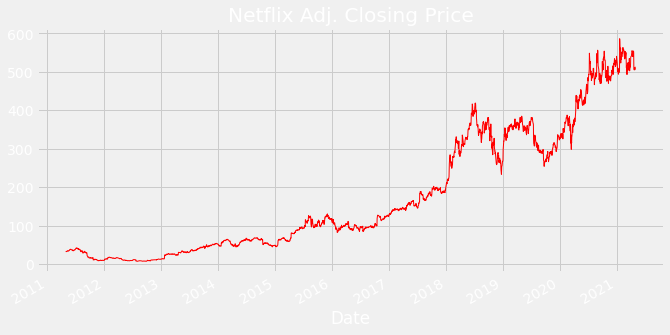

In [50]:
plt.style.use('fivethirtyeight')
netflix.plot(title='Netflix Adj. Closing Price', figsize=(10,5), color='red', linewidth=1)

<AxesSubplot:title={'center':'Netflix Cumulative Returns'}, xlabel='Date'>

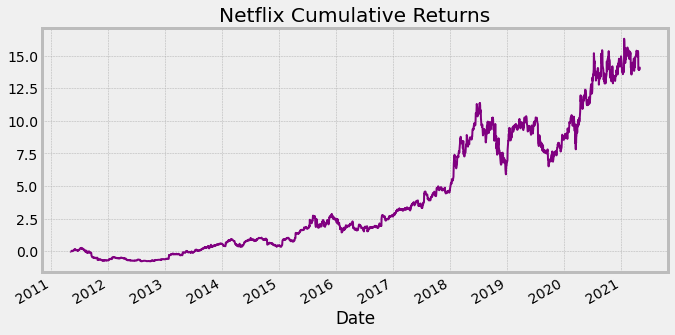

In [38]:
# Take percentage change of stock price of Netflix
returns = netflix.pct_change()
plt.style.use('bmh')
((1 + returns).cumprod() - 1).plot(title='Netflix Cumulative Returns',
                                  figsize=(10,5), color='purple')

# Getting Data Using API

In [41]:
# source:  https://github.com/RomelTorres/alpha_vantage
# Pull intraday data, example using Disney stock
from alpha_vantage.timeseries import TimeSeries

In [42]:
ts = TimeSeries(key='YO5B5V8JAZ0TBAYV', output_format='pandas')

In [43]:
# Get json object with the intraday data and another with  the call's metadata
# Use "DIS" for Disney or fill in a stock ticker of your choice
data, meta_data = ts.get_intraday('DIS',interval='1min', outputsize='full')

In [44]:
data.head(6)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-05-25 19:54:00,176.55,176.55,176.55,176.55,210.0
2021-05-25 19:41:00,176.29,176.29,176.29,176.29,125.0
2021-05-25 19:40:00,176.53,176.53,176.53,176.53,100.0
2021-05-25 19:32:00,176.28,176.28,176.28,176.28,190.0
2021-05-25 19:23:00,176.55,176.55,176.55,176.55,120.0
2021-05-25 19:05:00,176.50,176.50,176.50,176.50,506.0


In [45]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'DIS',
 '3. Last Refreshed': '2021-05-25 19:54:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [46]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

cc = CryptoCurrencies(key='YO5B5V8JAZ0TBAYV', output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')

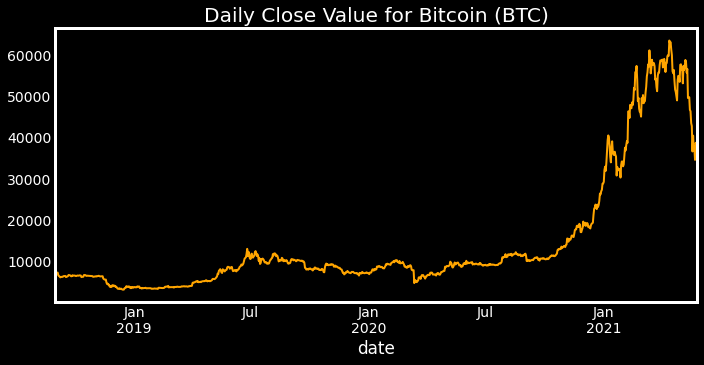

In [48]:
# Plot the data

plt.style.use('dark_background')
data['4b. close (USD)'].plot(figsize=(10,5), linewidth=2, color='orange')
plt.tight_layout()
plt.title('Daily Close Value for Bitcoin (BTC)')
plt.grid()
plt.show()